In [46]:
import os
import sys

from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt

from infovar import ContinuousHandler
from infovar.stats.info_theory import corr_to_info

sys.path.insert(0, os.path.join(".."))

from orion_util import latex_line, latex_param

plt.rc("text", usetex=True)
dirname = "continuous_profiles"

## Settings

In [47]:
lims = {
    'av': [1e+0, 8e+1],
    'g0': [None, None]
}

In [48]:
params_target = "g0"    # Can be "av", "g0" or ["av", "g0"]
param_regime = "g0"     # Can be "av" or "g0"
lines_list = ["12co10", "12cs21", "13co10", "c18o10", "hcn10", "hcop10", "hnc10", "n2hp10"]

## Helpers

In [49]:
def display_comb_params(c: Tuple[str]) -> str:
    if len(c) == 1:
        return f"${latex_param(c[0])}$"
    return "$(" + ",".join([latex_param(p) for p in c]) + ")$"

def display_comb_lines(c: Tuple[str], short: bool=False) -> str:
    if len(c) == 1:
        return f"${latex_line(c[0], short=short)}$"
    return "$(" + ",".join([latex_line(l, short=short) for l in c]) + ")$"

## Data loading

In [50]:
save_path = os.path.join("..", "data", "continuous")
ref_path = ""

handler = ContinuousHandler(
    ref_path=ref_path,
    save_path=save_path
)

## Formatting

In [51]:
if isinstance(params_target, str):
    params_target = [params_target]
assert isinstance(params_target, List)

if isinstance(lines_list, str):
    lines = [lines_list]
assert isinstance(lines_list, List)

for i, l in enumerate(lines_list):
    if isinstance(l, str):
        lines_list[i] = [l]
    assert isinstance(lines_list[i], List)

## Number of samples

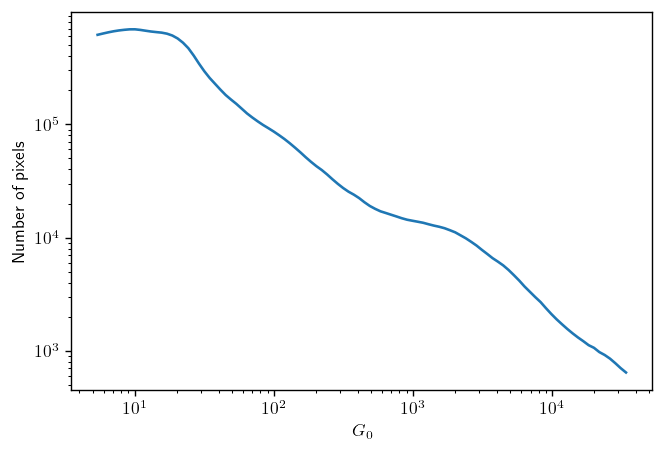

In [52]:
plt.figure(dpi=125)

d = handler.read(
    params_target, lines_list[0], param_regime
)

xticks = d[f'mi-coords'][0]
prof = d['samples']

plt.loglog(xticks, prof)
plt.xlim(lims[param_regime])

plt.xlabel(f"${latex_param(param_regime)}$")
plt.ylabel("Number of pixels")

filename = f"pixels_vs_{param_regime}.png"
plt.savefig(os.path.join(dirname, filename))
plt.show()

## Profiles

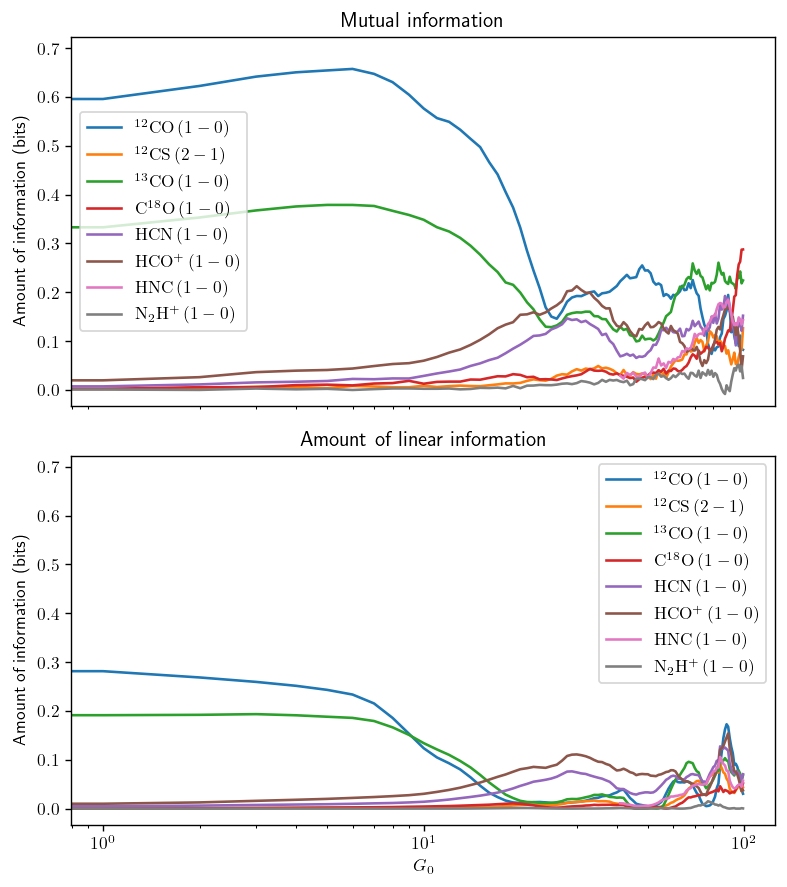

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.4, 1.5*4.8), dpi=125)

vmax = 0
for lines in lines_list:

    d = handler.read(
        params_target, lines, param_regime
    )

    xticks = d[f'mi-coords'][0]
    prof_mi = d[f'mi-data']
    prof_corr = corr_to_info(d[f'corr-data'])

    vmax = max(vmax, np.nanmax(prof_mi), np.nanmax(prof_corr))

    label = display_comb_lines(lines)

    ax1.semilogx(prof_mi, label=label)
    ax2.semilogx(prof_corr, label=label)

ax1.set_xlim(lims[param_regime])
ax2.set_xlim(lims[param_regime])
ax1.set_ylim([-0.05 * vmax, 1.1 * vmax])
ax2.set_ylim([-0.05 * vmax, 1.1 * vmax])

ax1.set_xticks([])

ax2.set_xlabel(f"${latex_param(param_regime)}$")
ax1.set_ylabel("Amount of information (bits)")
ax2.set_ylabel("Amount of information (bits)")

ax1.set_title("Mutual information")
ax2.set_title("Amount of linear information")

ax1.legend()
ax2.legend()

plt.tight_layout()

filename = f"{'_'.join(params_target)}_vs_{param_regime}.png"
plt.savefig(os.path.join(dirname, filename))
plt.show()

## Differences

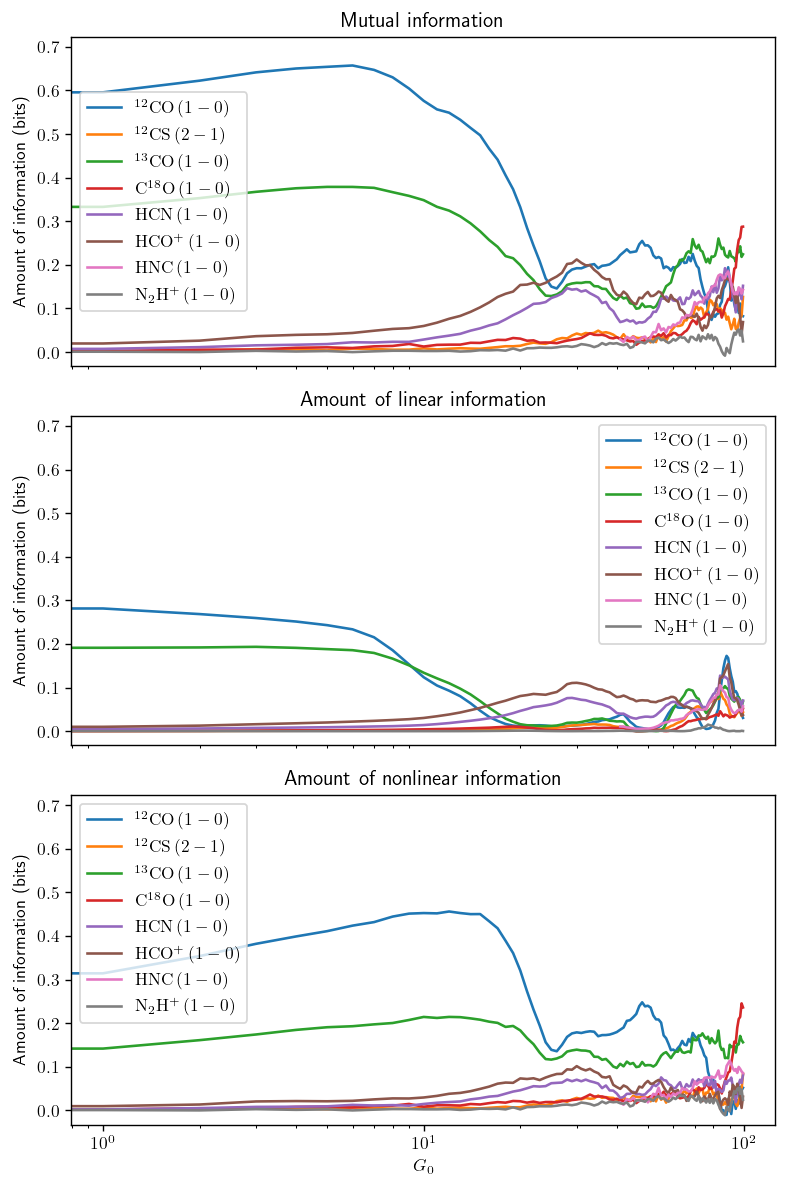

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6.4, 2*4.8), dpi=125)

vmax = 0
for lines in lines_list:

    d = handler.read(
        params_target, lines, param_regime
    )

    xticks = d[f'mi-coords'][0]
    prof_mi = d[f'mi-data']
    prof_corr = corr_to_info(d[f'corr-data'])
    diff = prof_mi - prof_corr

    vmax = max(vmax, np.nanmax(prof_mi), np.nanmax(prof_corr))

    label = display_comb_lines(lines)

    ax1.semilogx(prof_mi, label=label)
    ax2.semilogx(prof_corr, label=label)
    ax3.semilogx(diff, label=label)

ax1.set_xlim(lims[param_regime])
ax2.set_xlim(lims[param_regime])
ax3.set_xlim(lims[param_regime])
ax1.set_ylim([-0.05 * vmax, 1.1 * vmax])
ax2.set_ylim([-0.05 * vmax, 1.1 * vmax])
ax3.set_ylim([-0.05 * vmax, 1.1 * vmax])

ax1.set_xticks([])
ax2.set_xticks([])

ax3.set_xlabel(f"${latex_param(param_regime)}$")
ax1.set_ylabel("Amount of information (bits)")
ax2.set_ylabel("Amount of information (bits)")
ax3.set_ylabel("Amount of information (bits)")

ax1.set_title("Mutual information")
ax2.set_title("Amount of linear information")
ax3.set_title("Amount of nonlinear information")

ax1.legend()
ax2.legend()
ax3.legend()

plt.tight_layout()

filename = f"{'_'.join(params_target)}_vs_{param_regime}__diff.png"
plt.savefig(os.path.join(dirname, filename))
plt.show()